### Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

### Dataset

In [2]:
# Loading Suicide dataset
students_data = pd.read_csv('StudentsPerformance.CSV')

# Summary of the dataset
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
students_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df = pd.DataFrame(students_data)

# Preprocessing: Encode categorical variables
df["gender"] = df["gender"].map({"male": 0, "female": 1})

### Bar chart

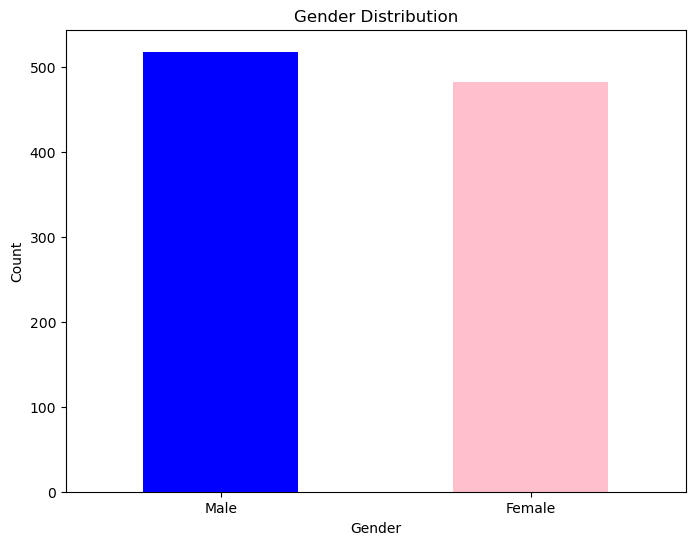

In [6]:
# Bar Chart: Gender Distribution
def plot_bar_chart(df):
    gender_counts = df["gender"].value_counts()
    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind="bar", color=["blue", "pink"])
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=0)
    plt.show()

plot_bar_chart(df)

### Scatter plot

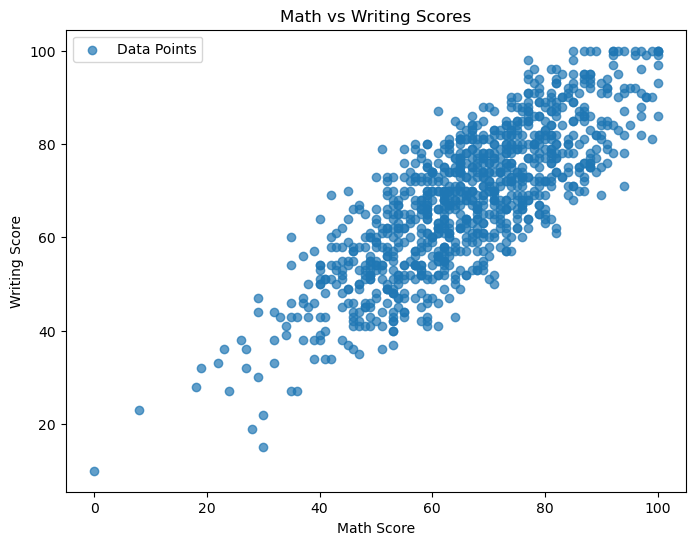

In [7]:
# Scatter Plot: Math vs Writing Scores with Line Fitting
def plot_scatter(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(df["math score"], df["writing score"], alpha=0.7, label="Data Points")
    plt.title("Math vs Writing Scores")
    plt.xlabel("Math Score")
    plt.ylabel("Writing Score")
    plt.legend()
    plt.show()

plot_scatter(df)

### Heatmap

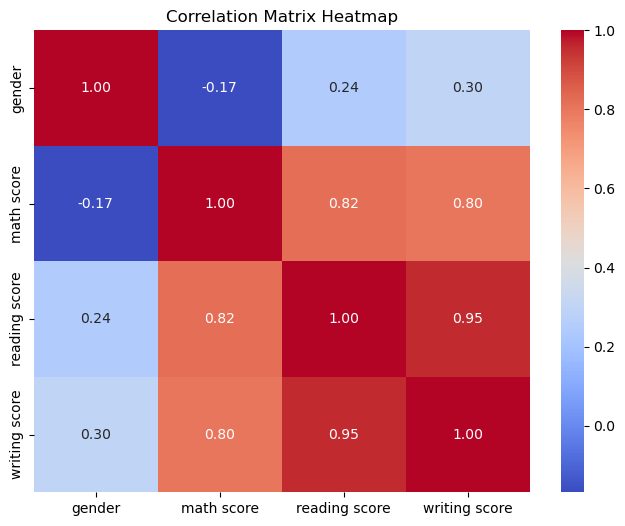

In [8]:
# Heatmap: Correlation Matrix
def plot_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

plot_heatmap(df)

### Clustering

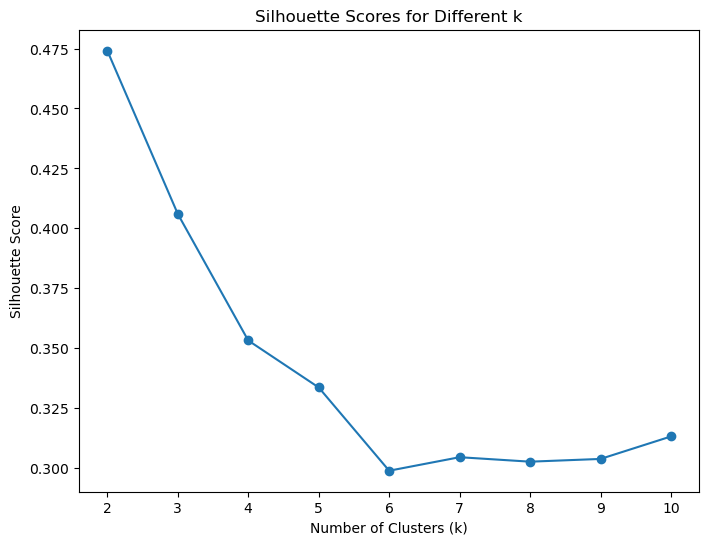

In [9]:
# Scaling numerical features for clustering
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(df[["math score", "reading score", "writing score"]])

# Silhouette Score for Optimal k
def plot_silhouette(scaled_data):
    silhouette_scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_data)
        silhouette_scores.append(silhouette_score(scaled_data, labels))
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, silhouette_scores, marker="o")
    plt.title("Silhouette Scores for Different k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.show()

plot_silhouette(scaled_scores)

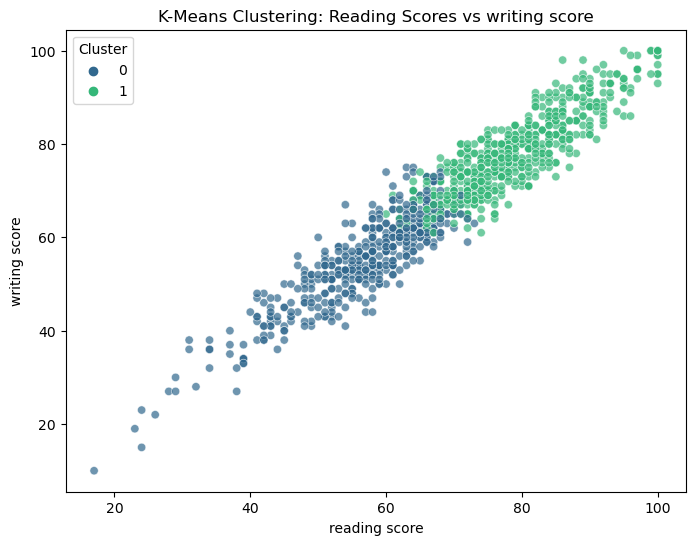

In [10]:
# Apply k-means clustering with the optimal number of clusters (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_scores)

# Visualize k-means clustering results: Math vs Reading Scores with Clusters
def plot_kmeans_clusters(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df["reading score"], 
        y=df["writing score"], 
        hue=df["Cluster"], 
        palette="viridis", 
        alpha=0.7
    )
    plt.title("K-Means Clustering: Reading Scores vs writing score")
    plt.xlabel("reading score")
    plt.ylabel("writing score")
    plt.legend(title="Cluster")
    plt.show()

plot_kmeans_clusters(df)

### Fitting

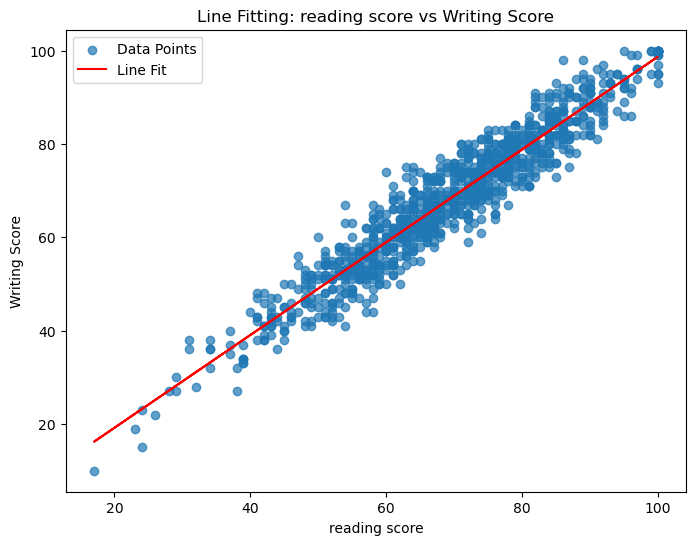

In [11]:
# Perform line fitting (Linear Regression): Math Score vs Writing Score
reg = LinearRegression()
X = df[["reading score"]]
y = df["writing score"]
reg.fit(X, y)
line_fit = reg.predict(X)

# Visualize line fitting
def plot_line_fitting(df, line_fit):
    plt.figure(figsize=(8, 6))
    plt.scatter(df["reading score"], df["writing score"], alpha=0.7, label="Data Points")
    plt.plot(df["reading score"], line_fit, color="red", label="Line Fit")
    plt.title("Line Fitting: reading score vs Writing Score")
    plt.xlabel("reading score")
    plt.ylabel("Writing Score")
    plt.legend()
    plt.show()

plot_line_fitting(df, line_fit)